In [1]:
from sklearn.datasets import fetch_california_housing

In [2]:
housing=fetch_california_housing(as_frame=True)

In [3]:
data,target=housing.data,housing.target

In [4]:
target

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [7]:
target *=100
target

0        4526000.0
1        3585000.0
2        3521000.0
3        3413000.0
4        3422000.0
           ...    
20635     781000.0
20636     771000.0
20637     923000.0
20638     847000.0
20639     894000.0
Name: MedHouseVal, Length: 20640, dtype: float64

In [8]:
from sklearn.tree import DecisionTreeRegressor

In [9]:
?DecisionTreeRegressor

Init signature:
DecisionTreeRegressor(
    *,
    criterion='squared_error',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    ccp_alpha=0.0,
)
Docstring:     
A decision tree regressor.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"squared_error", "friedman_mse", "absolute_error",             "poisson"}, default="squared_error"
    The function to measure the quality of a split. Supported criteria
    are "squared_error" for the mean squared error, which is equal to
    variance reduction as feature selection criterion and minimizes the L2
    loss using the mean of each terminal node, "friedman_mse", which uses
    mean squared error with Friedman's improvement score for potential
    splits, "absolute_error" for the mean absolute error, which minimizes
    the L1 loss usi

In [10]:
# https://scikit-learn.org/stable/modules/classes.html

regressor=DecisionTreeRegressor()

In [11]:
import pandas as pd
from sklearn.model_selection import cross_validate, ShuffleSplit

In [13]:
cv=ShuffleSplit(n_splits=30,test_size=0.2)
cv_results=cross_validate(
    regressor,
    data,
    target,
    cv=cv,
    scoring="neg_mean_absolute_error",
    return_train_score=True, n_jobs=2
    )

In [14]:
cv_results=pd.DataFrame(cv_results)

In [15]:
cv_results

,fit_time,score_time,test_score,train_score
0,0.143784,0.002699,-465631.225775,-0.0
1,0.145149,0.003514,-457712.877907,-0.0
2,0.145643,0.003149,-460588.616764,-0.0
3,0.145268,0.002019,-472170.518411,-0.0
4,0.142139,0.002506,-456486.577035,-0.0
5,0.143888,0.002567,-450035.712209,-0.0
6,0.137283,0.002506,-462114.270833,-0.0
7,0.141787,0.002120,-465581.862888,-0.0
8,0.145394,0.002006,-458631.257267,-0.0
9,0.142795,0.002299,-461012.218992,-0.0


In [16]:
scores=pd.DataFrame()

In [18]:
scores[["train_error","test_error"]]=-cv_results[["train_score","test_score"]]
scores

,train_error,test_error
0,0.0,465631.225775
1,0.0,457712.877907
2,0.0,460588.616764
3,0.0,472170.518411
4,0.0,456486.577035
5,0.0,450035.712209
6,0.0,462114.270833
7,0.0,465581.862888
8,0.0,458631.257267
9,0.0,461012.218992


<AxesSubplot: ylabel='Frequency'>

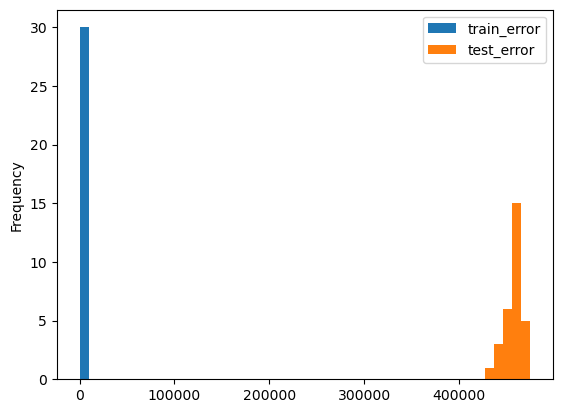

In [19]:
import matplotlib.pyplot as plt
scores.plot.hist(bins = 50)

In [20]:
from sklearn.model_selection import validation_curve

In [25]:
max_depth=[1,5,10,15,20,25]

In [24]:
from sklearn.model_selection import validation_curve
# train_scores,test_scores=validation_curve()

In [26]:
train_scores,test_scores=validation_curve(
    regressor,
    data,
    target,
    param_name="max_depth",
    param_range=max_depth,
    cv=cv,
    scoring="neg_mean_absolute_error",
    n_jobs=2
)

In [27]:
train_errors,test_errors=-train_scores,-test_scores

In [28]:
train_errors

array([[742074.9971125 , 745532.90966302, 742100.01962794,
        740796.89911751, 745565.43061232, 745282.15164856,
        745742.64270276, 743320.99156375, 746384.9358975 ,
        746290.79324542, 745422.93500286, 748978.72906156,
        741941.13023361, 743085.27093755, 741603.07349324,
        745576.17590444, 745155.69789945, 745497.62038812,
        746349.75212232, 742118.8382065 , 745118.68257585,
        748326.83779789, 746482.62398431, 746562.91424906,
        746111.46697926, 742856.86176788, 746899.91143824,
        743846.04962781, 741737.96077343, 746682.08735704],
       [512641.62820682, 512952.81869774, 508421.60511982,
        502827.019153  , 509873.57529281, 511623.08778473,
        509842.43388018, 501840.8308823 , 513212.97749595,
        509884.15425136, 507685.75367518, 503064.19674068,
        514715.64387644, 508105.55859272, 506205.43294143,
        506003.86543087, 506293.63417896, 503602.94915355,
        510037.89611877, 510158.68124697, 513204.534978

ValueError: too many values to unpack (expected 1)

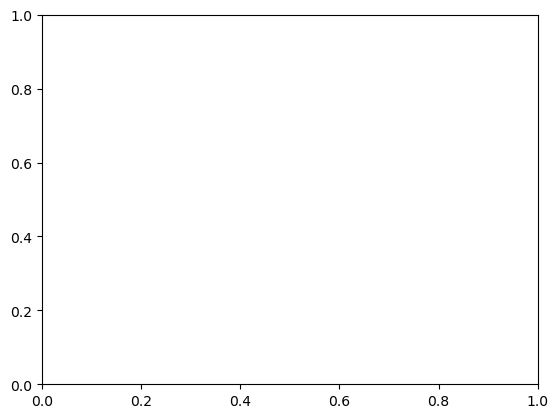

In [29]:
plt.errorbar(max_depth,train_errors)

In [31]:
train_errors.mean(axis=1)

array([744781.54636639, 508968.7245241 , 318703.22571698, 121920.77767901,
        23034.06040011,   2111.63525091])

In [32]:
train_errors.std(axis=1)

array([2098.40197658, 3795.12212501, 6532.75592081, 3911.44939097,
       1999.77363806,  577.05797074])